In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Hotel%20Reviews/Hotel_Reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [7]:
df.shape

(20491, 2)

In [8]:
vocab_size = 600
embedding_dim = 20
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20451

In [9]:
sentences = df['Review'].tolist()
labels  = df['Rating'].tolist()

In [10]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [11]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [12]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(42, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])
loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(loss=loss_fn,optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 20)          12000     
                                                                 
 global_average_pooling1d (G  (None, 20)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 42)                882       
                                                                 
 dense_1 (Dense)             (None, 6)                 258       
                                                                 
Total params: 13,140
Trainable params: 13,140
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/50
640/640 [==============================] - 2s 3ms/step - loss: 1.3899 - accuracy: 0.4416 - val_loss: 1.4626 - val_accuracy: 0.4250
Epoch 2/50
640/640 [==============================] - 1s 2ms/step - loss: 1.3291 - accuracy: 0.4431 - val_loss: 1.4222 - val_accuracy: 0.4500
Epoch 3/50
640/640 [==============================] - 1s 2ms/step - loss: 1.1944 - accuracy: 0.4651 - val_loss: 1.1161 - val_accuracy: 0.5500
Epoch 4/50
640/640 [==============================] - 2s 2ms/step - loss: 1.0511 - accuracy: 0.5141 - val_loss: 1.0417 - val_accuracy: 0.6500
Epoch 5/50
640/640 [==============================] - 1s 2ms/step - loss: 1.0017 - accuracy: 0.5398 - val_loss: 1.0553 - val_accuracy: 0.6000
Epoch 6/50
640/640 [==============================] - 2s 2ms/step - loss: 0.9685 - accuracy: 0.5603 - val_loss: 1.0436 - val_accuracy: 0.6250
Epoch 7/50
640/640 [==============================] - 1s 2ms/step - loss: 0.9405 - accuracy: 0.5790 - val_loss: 1.0036 - val_accuracy: 0.6000
Epoch 

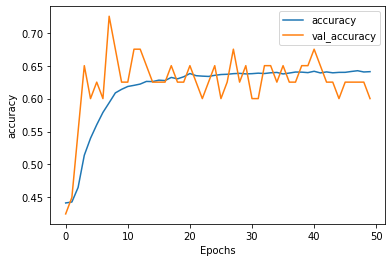

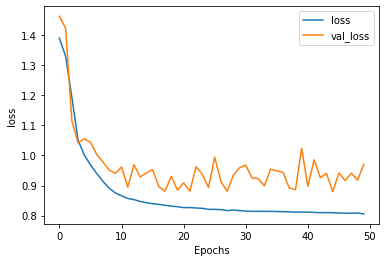

In [16]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [17]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[0])
print(labels[0])

nice hotel expensive parking got good deal stay hotel <OOV> arrived late evening took <OOV> previous reviews did <OOV> parking check quick easy little disappointed non <OOV> view room room clean nice size bed comfortable <OOV> <OOV> <OOV> high pillows not <OOV> like heard music room night morning <OOV> <OOV> doors <OOV> <OOV> hear people <OOV> <OOV> maybe just noisy <OOV> <OOV> bath <OOV> nice did not <OOV> stay nice touch taken <OOV> staying <OOV> location great walking distance shopping overall nice experience having pay <OOV> parking night ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?

In [18]:
for n in range(10):
    print(testing_sentences[n],': ',testing_labels[n],'\n')

luxury trumps space believe reviews say rooms small, luxurious, service missteps related hotel getting speed staff anxious make amends, beware tourist map chatty concierge seriously misrepresents distance asian museum closer, hike half, finally in-house restaurant juno really good offering inventive menu terrific service,   :  4 

excellent wedding just ca n't say good things, beautiful setting over-the-top helpful staff great value, feel lucky got beginning sure booked,   :  5 

history beauty superb service stayed reading recent remodel, seattle embark alaskan cruise arctic club real highlights trip, spent time just photographing lobby bar gorgeous banquet hall ceiling, beds luxuriously comfortable ca n't help impressed glad way attitude employee, treat,   :  5 

loved arctic overall items working stayed smallest room type room 903 arctic club 3 nights attending conference, check-in smooth courteous, room small think nicest rooms stayed, bathroom nice shower rainfall style showerhead

In [19]:
sentence = ["Feeling as though you are on top of the world, immerse yourself in the beauty that this unique landscape has to offer, bordered by pristine white beaches and the brilliant blues of the sea. Feel inspired by the hopes and dreams that have"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[3.2857848e-08 3.2643670e-01 1.7111194e-01 6.5809101e-02 2.2583371e-01
  6.9611967e-01]]
